In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
df = pd.read_csv("arrests.tsv", sep='\t')


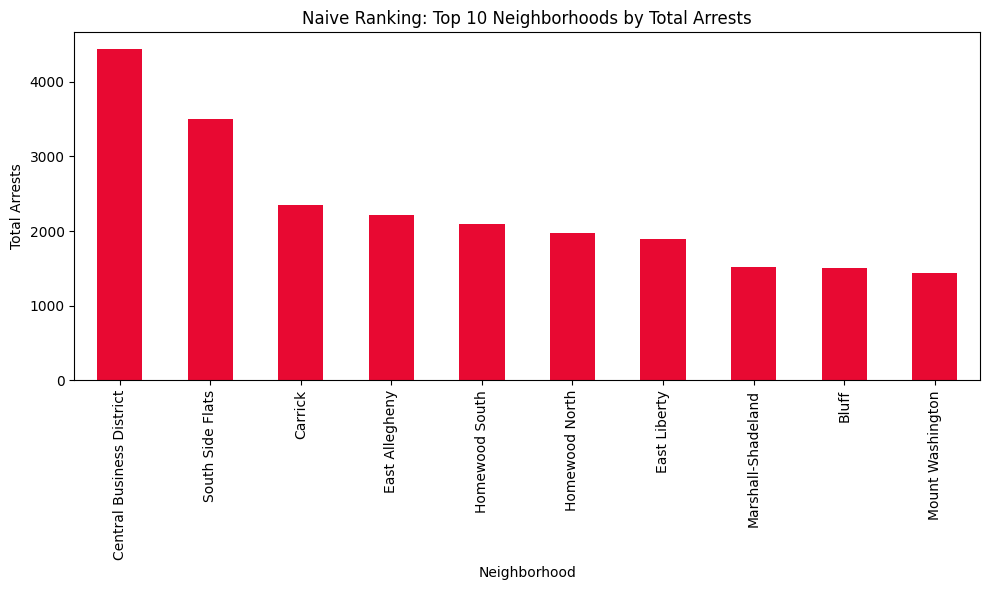

In [14]:
# Naive ranking of top 10 neighborhoods by just grouping them and then sorting based on counts of offenses

# Prepare a new grouped, sorted dataset
naive_counts = df['INCIDENTNEIGHBORHOOD'].value_counts().head(10)

# Plotting it
plt.figure(figsize=(10, 6))
naive_counts.plot(kind='bar', color='#e80932')
plt.title("Naive Ranking: Top 10 Neighborhoods by Total Arrests")
plt.xlabel("Neighborhood")
plt.ylabel("Total Arrests")
plt.tight_layout()
plt.show()

In [15]:
# Analysing the data in depth, looking for socially destructive offenses to make better sense of the data

# Defining top offenses and a function to help classify offense
top_destructive = ['2702 Aggravated Assault.', '2706 Terroristic Threats.', '3802(a)(1) DUI - General Impairment', '13(a)(30) Possession w', '2705 Recklessy Endangering Another Person.']

def classify_offense(offense):
    for top in top_destructive:
        if top in offense:
            return top
    return "Other"

# Polish the dataframe by splitting multiple offenses into multiple rows using explode() function
split_df = df.dropna(subset=['OFFENSES']).copy()
split_df = split_df.assign(OFFENSES=split_df['OFFENSES'].str.split('/')).explode('OFFENSES')
split_df['OFFENSES'] = split_df['OFFENSES'].str.strip()
split_df['OFFENSE_GROUP'] = split_df['OFFENSES'].apply(classify_offense)

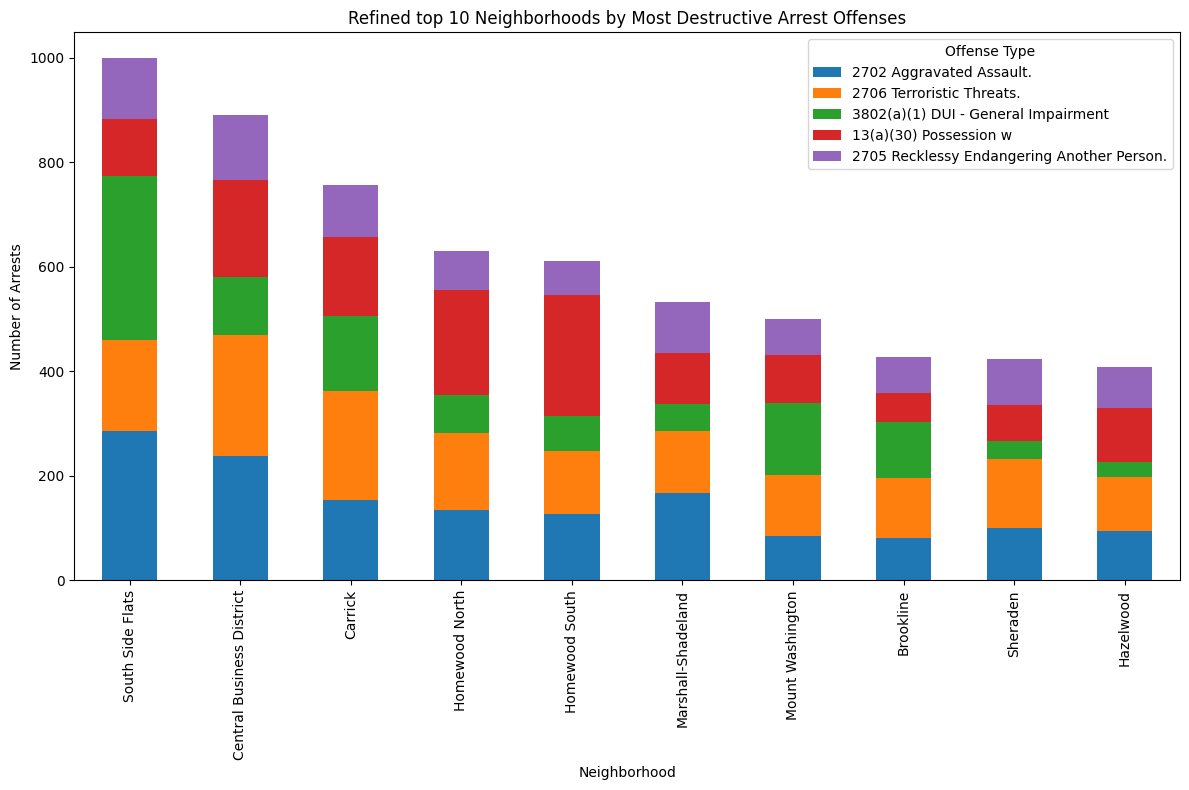

In [16]:
# Filter only the destructive offenses, group by neighborhood
destructive_dataset = split_df[split_df['OFFENSE_GROUP'].isin(top_destructive)]
destructive_n = destructive_dataset.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSE_GROUP']).size().unstack(fill_value=0)

# Find the total counts of destructive arrests and sort the data accordingly
destructive_n['Total'] = destructive_n.sum(axis=1)
top10 = destructive_n.sort_values('Total', ascending=False).head(10)

# Prepare the data for plotting by dropping the "Total" column
top10 = top10[top_destructive]

# Plot the graph
top10.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Refined top 10 Neighborhoods by Most Destructive Arrest Offenses")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Arrests")
plt.legend(title="Offense Type")
plt.tight_layout()
plt.show()